# *Neural Systems, Neural Networks, and Behavior HW3* 

 **Group 2: Faisal Anwar, Caitlyn Talley, Taylor Baugher, Rosario Reyes, and Marisa Brito**

* Below is our code for a leaky integrate and fire model neuron:

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []

    for i, t in enumerate(time_points):
        if membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
        else:
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1])

    return time_points, membrane_potential, spike_times



These are our **Parameters**:

In [18]:
current_input_values = np.linspace(0,1,2)  # Different current inputs
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1.0  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 100  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds

Here, we plot the firing patterns based on *different inputs*:

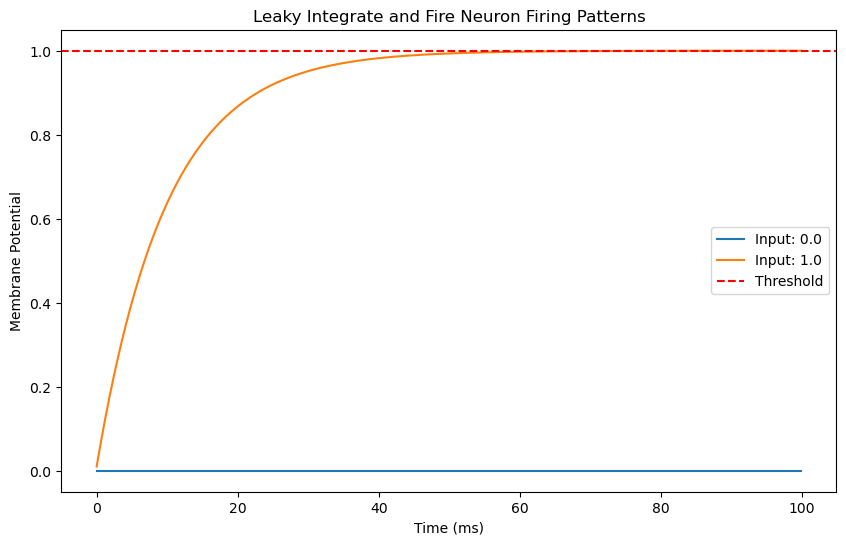

In [20]:
plt.figure(figsize=(10, 6))

for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}')

plt.title('Leaky Integrate and Fire Neuron Firing Patterns')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()


# **Homework 2 Questions:**

1. Unlike actual neurons, this neuron model is missing a refractory period. Also, current is too consistent in this model. In actuality, current can leak in and out of the neuron's membrane. 
2. Testing and fixing the code so that it runs smoothly within the JupyterLab interface was the most difficult part of this assignment.
3. This assignment took our group roughly an hour to complete. 


# **Homework 3 Adaptations:**


1. We need voltage gated sodium channels to simulate the refractory period of a real biological neuron. This will put a refractory period in between action potentials in our model.

   


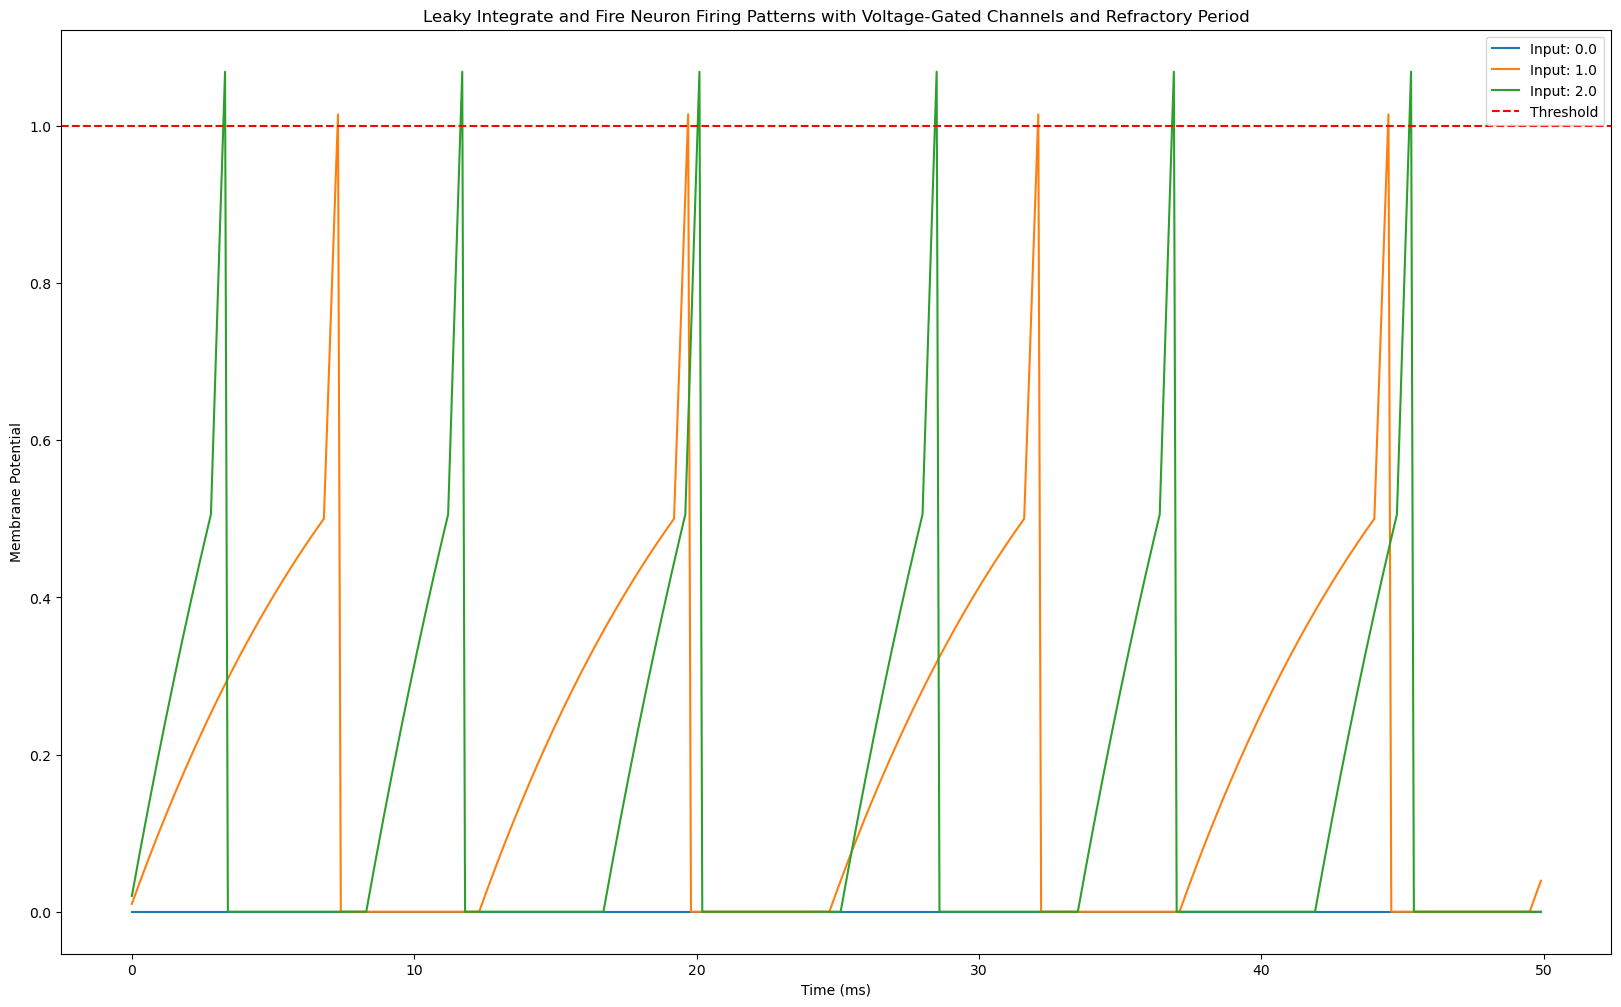

In [26]:
import numpy as np
import matplotlib.pyplot as plt


def leaky_integrate_and_fire(current_input, membrane_time_constant, threshold, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period):
    time_points = np.arange(0, simulation_time, dt)
    membrane_potential = np.zeros_like(time_points)
    spike_times = []
    last_spike_time = -refractory_period


    for i, t in enumerate(time_points):
        if t - last_spike_time < refractory_period:
            membrane_potential[i] = reset_voltage
        elif membrane_potential[i-1] >= threshold:
            membrane_potential[i] = reset_voltage
            spike_times.append(t)
            last_spike_time = t
        else:
            # Calculate sodium current contribution
            sodium_current = 0.0
            if membrane_potential[i-1] >= sodium_channel_threshold:
                sodium_current = 10.0  # Arbitrary value representing sodium current


            # Update membrane potential with sodium current
            membrane_potential[i] = membrane_potential[i-1] + (dt / membrane_time_constant) * (current_input - membrane_potential[i-1] + sodium_current)


    return time_points, membrane_potential, spike_times


# Define parameters
current_input_values = np.linspace(0, 2, 3)  # Different current inputs
personal_input = 5
membrane_time_constant = 10.0  # Time constant of the membrane
threshold_voltage = 1  # Membrane potential threshold for firing
reset_voltage = 0.0  # Membrane potential reset value after firing
simulation_time = 50  # Simulation time in milliseconds
dt = 0.1  # Time step in milliseconds
sodium_channel_threshold = 0.5  # Threshold for opening sodium channels
refractory_period = 5  # Duration of the refractory period in milliseconds


plt.figure(figsize=(20, 12))


for current_input in current_input_values:
    time_points, membrane_potential, spike_times = leaky_integrate_and_fire(current_input, membrane_time_constant, threshold_voltage, reset_voltage, simulation_time, dt, sodium_channel_threshold, refractory_period)
    plt.plot(time_points, membrane_potential, label=f'Input: {current_input}')


plt.title('Leaky Integrate and Fire Neuron Firing Patterns with Voltage-Gated Channels and Refractory Period')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.axhline(y=threshold_voltage, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()



3. We needed to modify the calculation of the membrane potential to account for the contribution of sodium currents during action potential generation.
4. We worked very collaboratively and while we didn't use the GitHub Collaboration features, we have found a system that is more robust and works for our team
5. **Gradient descent:** numerical optimization algorithm that trains machine learning models and neural networks that is used to find the optimal parameters of a neural network
      Gradient descent is a machine driven process with a complex system for optimization. This may increase the run time of the model but the effeciency at which the message is communicated is faster.
   
   **Backprogagation:** the practice of fine-tuning the weights of a neural net based on the error rate (loss) obtained in the previous iteration.
       Backpropagation may also increase the complexity of the code in a feedforward and feedback neural system and we would have more of a hand in implementing these changes than gradient descent implementation would.

   *Increased complexity tells us that this neural system/network has the power to transmit more information.*